## Thompson Sampling (TS) 

汤普森采样是解决多臂老虎机问题的最早的一个启发式的算法，其核心是基于 Bayesian 思想的概率算法，它可以通过 Beta 分布来定义。

- UCB 是确定性 (deterministic) 算法; 而 Thompson 采样是概率算法
- UCB 在每一轮都需要重新计算置信上界，否则无法进行下一轮；而 Thompson 采样可以在若干轮后再计算；
- TS 在应用的性能上优于 UCB；

### 1. How TS Algorithm works?

TS 算法是基于 Beta 概率分布来实现的，因为用 Beta 分布可以根据之前的先验概率来计算当前的后验概率。

$$
Beta(p; \alpha, \beta) = \frac{1}{B(\alpha, \beta)} p^{\alpha - 1} (1 - p)^{\beta - 1}
$$

### 2. 算法

#### Step 1: 

在第 n 轮，对于广告 i，我们仅考虑两个数：

- $N_i^1(n)$: 前 n 轮中，广告 i 获得激励 1 的次数；
- $N_i^0(n)$: 前 n 轮中，广告 i 获得激励 0 的次数；

#### Step 2:

对于每一个广告 i, 从 $ Beta(N_i^1(n) + 1, N_i^0(n) + 1) $ 分布中随机选择一个数 $\theta_i(n)$ :

$$
\theta_i(n) \in Beta(N_i^1(n) + 1, N_i^0(n) + 1)
$$

#### Step 3:

选择最大的 $ \theta_i(n) $ 的广告进行展示。

### 3. 算法实现

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [8]:
def get_thompson_sampling_reward(dataset, round_N, d_arms):
    total_reward = 0
    ads_selected = []
    n1_rewards = [0] * d_arms
    n0_rewards = [0] * d_arms
    
    for n in range(0, round_N):
        ad = 0
        max_theta = 0
        
        for i in range(0, d_arms):
            rand_theta = np.random.beta(n1_rewards[i] + 1, n0_rewards[i] + 1)
            if rand_theta > max_theta:
                ad = i
                max_theta = rand_theta
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        
        if reward == 1:
            n1_rewards[ad] += 1
        else:
            n0_rewards[ad] += 0
            
        total_reward += reward
    return total_reward, ads_selected

In [12]:
for i in range(10):
    reward, ads = get_thompson_sampling_reward(df, 10000, 10)
    print("%d reward is %.2f" % (i+1, reward))

1 reward is 2503.00
2 reward is 2216.00
3 reward is 2199.00
4 reward is 1912.00
5 reward is 2179.00
6 reward is 2257.00
7 reward is 2384.00
8 reward is 2426.00
9 reward is 2227.00
10 reward is 2307.00


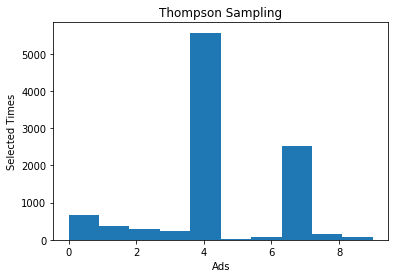

In [13]:
plt.hist(ads)
plt.title("Thompson Sampling")
plt.xlabel("Ads")
plt.ylabel("Selected Times")
plt.show()

### 4. 分析

1. TS 是一个概率随机算法；
2. TS 效果要好于 UCB;